## Домашнее задание "Сегментация и детекция объектов"

Распознавание рукописного ввода на примере базы MNIST

Построить классификатор изображений рукописного ввода на базе MNIST. В качестве шаблона в данной работе можно использовать ipython-ноутбук 002-digit.ipynb.

Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.

Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import os
import zipfile

with zipfile.ZipFile("digit-recognizer.zip","r") as zip_ref:
    zip_ref.extractall(os.getcwd() + '/digit-recognizer')

In [4]:
train = np.loadtxt('./digit-recognizer/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./digit-recognizer/test.csv', delimiter=',', skiprows=1)

In [5]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_data = train[:, 1:]
train_img = np.reshape(train_data, (train_data.shape[0], 28*28))

In [6]:
from sklearn.preprocessing import MinMaxScaler

mm_X = MinMaxScaler()
train_img = mm_X.fit_transform(train_img)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_img,
                                                    train_label,
                                                    test_size=0.2,
                                                    random_state=42)

In [8]:
train_img.shape

(42000, 784)

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [10]:
clf.fit(X_train, y_train)

SVC()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

accuracy=metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100
print("Accuracy:", accuracy, "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:',mae)
r_score = r2_score(y_test, y_pred)
print('Accuracy:',r_score*100)

Accuracy: 97.3452380952381 

[[807   0   0   0   2   1   4   0   1   1]
 [  0 902   1   1   1   1   0   1   1   1]
 [  3   3 820   2   8   0   3   3   4   0]
 [  1   3   5 898   0   9   0   6  11   4]
 [  1   0   1   0 815   1   5   3   0  13]
 [  1   1   1   8   2 679   6   0   2   2]
 [  3   1   0   0   0   1 777   0   3   0]
 [  0   2   7   0   4   1   0 867   2  10]
 [  1   2   3   7   5   4   0   2 810   1]
 [  2   2   1  10  10   1   0   7   3 802]]
Mean squared error: 0.4745238095238095
Mean absolute error: 0.09928571428571428
Accuracy: 94.30346162449045


In [13]:
import pandas as pd

test_img = np.reshape(test, (test.shape[0], 28*28))
test_img = mm_X.fit_transform(test_img)

clf_pred = clf.predict(test_img)

In [14]:
clf_pred_df = pd.DataFrame({'ImageId': list(range(1, len(clf_pred) + 1)), 
                            "Label": clf_pred})
clf_pred_df["Label"] = clf_pred_df["Label"].astype(int)

clf_pred_df.to_csv("clf_pred.csv", index=False, header=True)

In [15]:
clf_pred_df.shape

(28000, 2)

In [16]:
clf_pred_df.head(5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


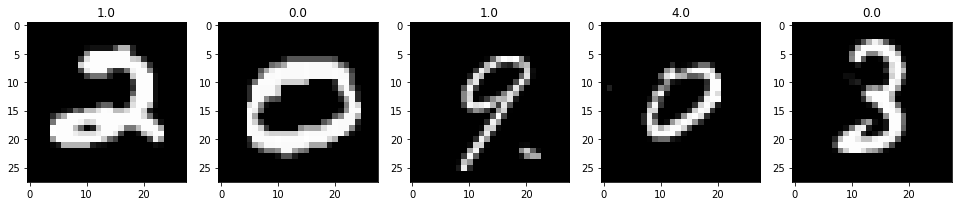

In [17]:
img = np.reshape(test, (test.shape[0], 28, 28))

n = 5
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(img[0:n], 1):
    subplot = fig.add_subplot(1, n+1, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

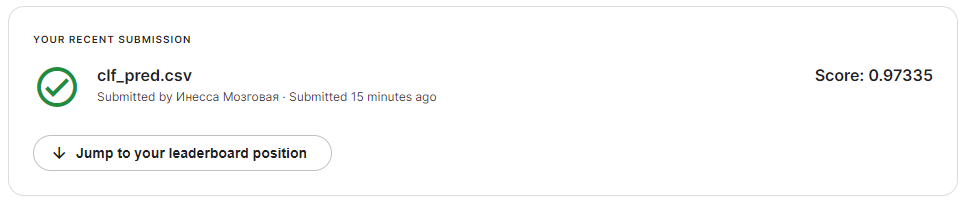